# Import data and libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/gender-by-name/name_gender_dataset.csv')
df.head()

,Name,Gender,Count,Probability
0,James,M,5304407,0.014517
1,John,M,5260831,0.014398
2,Robert,M,4970386,0.013603
3,Michael,M,4579950,0.012534
4,William,M,4226608,0.011567


# EDA - Exploratory Data Analysis

1. Summary statistics

In [3]:
df.describe()

,Count,Probability
count,1.472690e+05,1.472690e+05
mean,2.481161e+03,6.790295e-06
std,4.645472e+04,1.271345e-04
min,1.000000e+00,2.736740e-09
25%,5.000000e+00,1.368370e-08
50%,1.700000e+01,4.652460e-08
75%,1.320000e+02,3.612500e-07
max,5.304407e+06,1.451679e-02


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147269 entries, 0 to 147268
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Name         147269 non-null  object 
 1   Gender       147269 non-null  object 
 2   Count        147269 non-null  int64  
 3   Probability  147269 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.5+ MB


In [5]:
df.shape

(147269, 4)

Checking missing values:

In [6]:
df.isnull().sum()

Name           0
Gender         0
Count          0
Probability    0
dtype: int64

We don't have any missing values. That's really good!

2. Gender Distribution

Plot a bar chart and pie chart to visualize the distribution of genders ('M' and 'F') in the dataset.

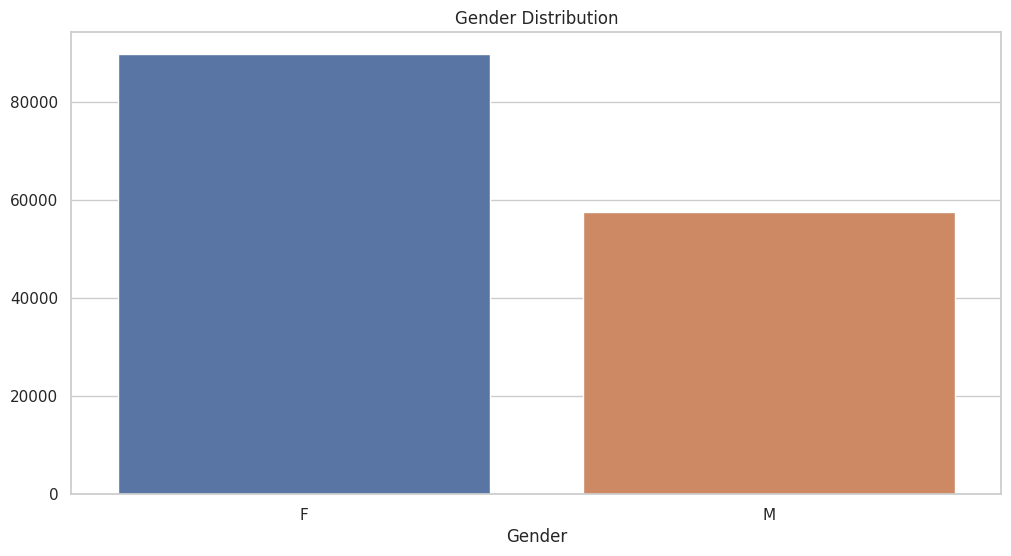

In [7]:
sns.set(style = 'whitegrid')

num_gender = df["Gender"].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(x = num_gender.index, y = num_gender.values)
plt.title('Gender Distribution')
plt.show()

3. Correlation analysis